In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import normalize
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

import spacy
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
import re

import matplotlib.pyplot as plt 

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Stop words & NLP Process

In [3]:
link = "https://drive.google.com/file/d/1evHu3yqsSzaBVhQZX8Xm3nhMzcKl2oWi/view?usp=share_link"

# Get the ID after the equals sign
chunk, id_processed1 = link.split('/d/')
id, chunk = id_processed1.split('/')

# Get the data frame from google drive
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('common_words.txt') 

nltk.download('wordnet')
nltk.download('punkt')

lemma = nltk.wordnet.WordNetLemmatizer()

# Import stop words from the txt file
text_file = open("common_words.txt", "r")
common_words = text_file.read().split('\n')
print(common_words)

# Choose top 500 words as stop words
stop_words = common_words[:500]

# NLP cleaning function 
def nlp_process(text):
    
    # Case lowering 
    text = text.lower()
    # Replacing all special characters including numbers
    text = re.sub('[^A-Za-z]+',' ', text)
    # Tokenizing text into word list
    text = nltk.word_tokenize(text)
    # Removing stop words
    text = [word for word in text if word not in stop_words]
    # WordNet lemmatizing each tokenized word 
    text = [lemma.lemmatize(word) for word in text]
    # Joining words together 
    text = ' '.join(text)
    
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['the', 'of', 'and', 'to', 'a', 'in', 'for', 'is', 'on', 'that', 'by', 'this', 'with', 'i', 'you', 'it', 'not', 'or', 'be', 'are', 'from', 'at', 'as', 'your', 'all', 'have', 'new', 'more', 'an', 'was', 'we', 'will', 'home', 'can', 'us', 'about', 'if', 'page', 'my', 'has', 'search', 'free', 'but', 'our', 'one', 'other', 'do', 'no', 'information', 'time', 'they', 'site', 'he', 'up', 'may', 'what', 'which', 'their', 'news', 'out', 'use', 'any', 'there', 'see', 'only', 'so', 'his', 'when', 'contact', 'here', 'business', 'who', 'web', 'also', 'now', 'help', 'get', 'pm', 'view', 'online', 'c', 'e', 'first', 'am', 'been', 'would', 'how', 'were', 'me', 's', 'services', 'some', 'these', 'click', 'its', 'like', 'service', 'x', 'than', 'find', 'price', 'date', 'back', 'top', 'people', 'had', 'list', 'name', 'just', 'over', 'state', 'year', 'day', 'into', 'email', 'two', 'health', 'n', 'world', 're', 'next', 'used', 'go', 'b', 'work', 'last', 'most', 'products', 'music', 'buy', 'data', 'make', 'th

In [4]:
link = "https://drive.google.com/file/d/1-ugGTJiuPNAC3MzHucHIkGWgwI9-21vO/view?usp=share_link"

# Get the ID after the equals sign
chunk, id_processed1 = link.split('/d/')
id, chunk = id_processed1.split('/')

# Get the data frame from google drive
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mail_data.csv')  

# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

link2 = "https://drive.google.com/file/d/12x8kf5zU640HVEi2Z28bMTNJsaoaEyjx/view?usp=share_link"

# Get the ID after the equals sign
chunk, id_processed1 = link2.split('/d/')
id, chunk = id_processed1.split('/')

# Get the data frame from google drive
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data.csv') 

# loading the data from csv file to a pandas Dataframe
data = pd.read_csv('data.csv')
data.head()

link3 = "https://drive.google.com/file/d/1WqOpyuFJvqlhCwkV6IElpXP1HX87HQVK/view?usp=share_link"

# Get the ID after the equals sign
chunk, id_processed1 = link3.split('/d/')
id, chunk = id_processed1.split('/')

# Get the data frame from google drive
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('training_data.csv') 

# loading the data from csv file to a pandas Dataframe
others = pd.read_csv('training_data.csv')
others.head()

,text_join,class
0,best methodi live uk access firearms someone t...,2
1,relieving update enough oxycodone overdose goi...,2
2,need wayi need fucking way die pussy cut death...,2
3,know need redo really big project science basi...,1
4,finally post finally post rteenagers would lik...,1


In [5]:
others = others.loc[others['class']==0]
others['word_count'] = others['text_join'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
other_data = others[others['word_count'] > 10]
other_data

,text_join,class,word_count
5,day one ngl found modification harderloved day...,0,20
7,mp behind uk internet porn filter hacked accus...,0,22
18,8000yrold carvings stone destroyed moroccos hi...,0,26
22,amazing video thank guys amazing videos use ti...,0,19
26,thanks lot truly enjoyed watching video used a...,0,19
...,...,...,...
117056,new also happy see stuff already happy explana...,0,17
117062,til prime minister italy silvio berlusconi ins...,0,27
117066,jim l j stated others tedx talk ted talk tedx ...,0,40
117067,lifetime reading slows cognitive decline new r...,0,21


In [6]:
print(data.shape)
def split_sentences(text):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return sentences

data['Answers'] = data['Answers'].apply(split_sentences)
data = data.explode('Answers').reset_index(drop=True)
print(data)

(324, 3)
               Category                                          Questions  \
0     Linear Regression  What are the assumptions required for linear r...   
1     Linear Regression  What are the assumptions required for linear r...   
2     Linear Regression  What are the assumptions required for linear r...   
3     Linear Regression  What are the assumptions required for linear r...   
4     Linear Regression  What are the assumptions required for linear r...   
...                 ...                                                ...   
1288     Neural Network  For NLP, what’s the main purpose of using an e...   
1289     Neural Network  For NLP, what’s the main purpose of using an e...   
1290                EDA  When using scikit-learn, is it true that we ne...   
1291                EDA  When using scikit-learn, is it true that we ne...   
1292                EDA  When using scikit-learn, is it true that we ne...   

                                                Answer

## Clean data

In [7]:
# Cleaning up Questions and Answers
# data['Answers'] = data['Answers'].apply(lambda x: nlp_process(x))
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
# # label spam mail as 0;  ham mail as 1;
# mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
# mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1
# mail_data['normal'] = mail_data.loc[mail_data['Category'] == 1, 'Message']
# other_data['normal'] = other_data['text_join'].astype(str).apply(lambda x: nlp_process(x))
other_data['normal'] = other_data['text_join'].astype(str)
other_data.replace('', np.nan, inplace=True)
other_data.replace('nan', np.nan, inplace=True)
other_data = other_data.dropna()

# Reduce sample cause it's too big
# num_rows = int(len(mail_data['normal']) * 0.10)
# selected_indices = np.random.choice(mail_data.index, size=num_rows, replace=True)
# reduced_data = mail_data['normal'].loc[selected_indices].reset_index(drop=True)
# num_rows = int(len(mail_data['normal']) * 0.10)
# selected_indices = np.random.choice(mail_data.index, size=num_rows, replace=True)
# reduced_data = mail_data['normal'].loc[selected_indices].reset_index(drop=True)
num_rows = int(len(other_data['normal']) * 0.05)
selected_indices = np.random.choice(other_data.index, size=num_rows, replace=True)
reduced_data = other_data['normal'].loc[selected_indices].reset_index(drop=True)

d_length = len(data['Answers'])
c_length = len(reduced_data)
samples = d_length - c_length
oversampled_indices = np.random.choice(other_data['normal'].index, size=samples, replace=True)
oversampled_df2 = other_data['normal'].loc[oversampled_indices].reset_index(drop=True)
# Concatenate 
new_df = pd.concat([data['Answers'], oversampled_df2], axis=1)
new_df.head()

<ipython-input-7-2bcb90f2f583>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data['normal'] = other_data['text_join'].astype(str)
<ipython-input-7-2bcb90f2f583>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data.replace('', np.nan, inplace=True)
<ipython-input-7-2bcb90f2f583>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data.replace('nan', np.nan, i

,Answers,normal
0,There are four assumptions associated with a l...,kim speaking quietly time except speaking pale...
1,Homoscedasticity: The variance of the residual...,til cruise ship oceanos sank crew abandoned sh...
2,Independence: Observations are independent of ...,looking forward pm pm et today please go ahead...
3,"Normality: For any fixed value of X, Y is norm...",laughing loud desi like sort storage dresses h...
4,Extreme violations of these assumptions will m...,namrata going start today hope lose atleast kg...


## Creating new dataset

In [8]:
# Combine columns A and B into a single column C and add a source column
df_new = pd.melt(new_df, value_vars=['normal', 'Answers'], var_name='Source', value_name='Combined')
df_new.replace('', np.nan, inplace=True)
df_new.replace('nan', np.nan, inplace=True)
df = df_new.dropna()

df.loc[df['Source'] == 'normal', 'Source'] = 0
df.loc[df['Source'] == 'Answers', 'Source'] = 1

df


<ipython-input-8-98027d9dacaa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Source'] == 'normal', 'Source'] = 0
<ipython-input-8-98027d9dacaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Source'] == 'Answers', 'Source'] = 1


,Source,Combined
0,0,kim speaking quietly time except speaking pale...
1,0,til cruise ship oceanos sank crew abandoned sh...
2,0,looking forward pm pm et today please go ahead...
3,0,laughing loud desi like sort storage dresses h...
4,0,namrata going start today hope lose atleast kg...
...,...,...
2581,1,What makes an encoder-decoder model so powerfu...
2582,1,This gives the decoder access to the informati...
2583,1,Yes.
2584,1,Most of the machine learning algorithms use Eu...


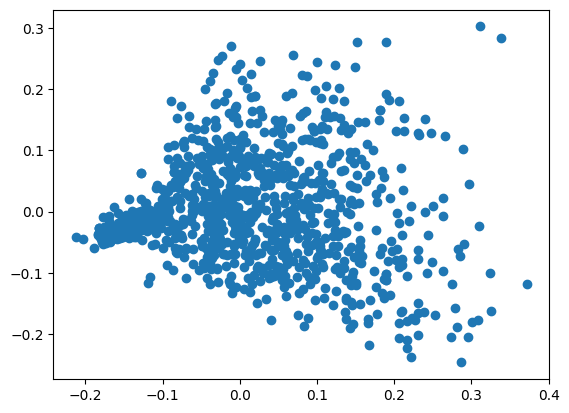

In [32]:
# separating the data as texts and label
X = df['Combined']
Y = df['Source']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(lowercase=True, stop_words='english')
# train_X = feature_extraction.fit_transform(data['Answers'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X_train_features = pipeline.fit_transform(X_train).todense()
pca = PCA(n_components=2).fit(np.array(X_train_features))
data2D = pca.transform(np.array(X_train_features))
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()

# X_train_features = feature_extraction.fit_transform(X_train)
# X_train_normalized = normalize(X_train_features)
# print(X_train_normalized)
X_test_features = pipeline.transform(X_test).todense()

# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## Model - Search for best params

In [10]:
# test_model=IsolationForest(random_state=5)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_samples': [0.5, 0.7, 1.0],
#     'contamination': [0.05, 0.1, 0.2],
#     'max_features': [1, 2, 3, 4, 5]
# }


# # Create a custom scoring function using roc_auc_score
# scorer = make_scorer(accuracy_score)

# # Create GridSearchCV object with the custom scoring function
# grid_search = GridSearchCV(estimator=test_model, param_grid=param_grid, scoring=scorer, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_features) 

# best_params = grid_search.best_params_

# print(best_params)

[ 1 -1  1 ...  1  1  1]


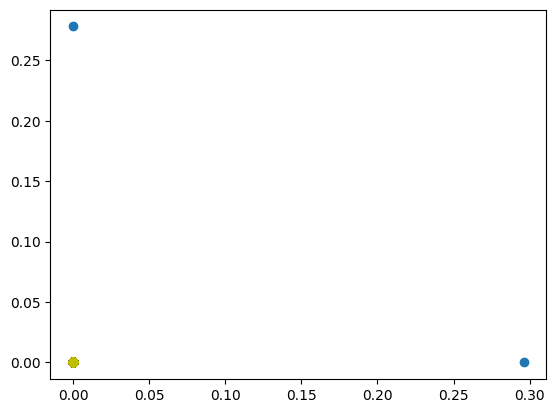

In [33]:
# Best param = 'contamination': 0.05, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 100
model = IsolationForest(contamination= 0.1, max_features= 1, n_estimators= 100, max_samples=0.5)
# model = LogisticRegression(class_weight='balanced')
# model.fit(X_train_features, Y_train)
# training the model with the training data
# model = model.fit(np.array(X_train_features))
model = model.fit(np.array(X_train_features))
predictions = model.predict(np.array(X_train_features))

X_train_features_dense = X_train_features
print(predictions)
outlier_index = np.where(predictions == -1)[0] 
values = X_train_features_dense[outlier_index]
 
plt.scatter([X_train_features_dense[:,0]], [X_train_features_dense[:,1]])
plt.scatter([values[:,0]], [values[:,1]], color='y')
plt.show()

In [42]:
import pickle
import joblib

filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))
joblib.dump(pipeline, 'pipeline.pkl')
# wb means writing in binary format

['pipeline.pkl']

In [34]:
# prediction on training data
prediction_on_training_data = model.predict(np.array(X_train_features))
print(prediction_on_training_data)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

# prediction on test data
prediction_on_test_data = model.predict(np.array(X_test_features))
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

[ 1 -1  1 ...  1  1  1]
Accuracy on training data :  0.751147842056933
Accuracy on test data :  0.7173447537473233


In [37]:
input_stuff = ["My name is Lim Jia Yu, currently a sophomore in Universiti Malaya, Malaysia pursuing Bachelor of Computer Science, majoring in Artificial Intelligence. I am a tenacious and industrious individual that embraces hindrances, as the key to my life is accepting challenges. I am always prepared to admit my own imperfection, and willing to learn from anyone for continuous self-improvement. I would also acknowledge myself as a sporty person as I love playing sports in my free time especially basketball and badminton, it has been undetachable from my life. The main reason that prompted me to choose this degree path is I am fascinated to envisage how Artificial Intelligence (AI) is going to revolutionize our future. No one could ever stop learning in this constantly-developing world, in order to prevail over the obstacles in life and to bring a better future to the incoming generation. Hence, I am always inquisitive in discovering a better computer science-related skill set in myself, namely AI. Speaking of my career specific goals, as I have not completely specialized in Artificial Intelligence fields such as Image Processing, Computer Vision etc, I am still unsure of my further career or study pathway. However, I would definitely dive deep into AI, utilize what I have learnt in creating impacts to the world that I lived in. I would not expect a great start, but continuous improvement in my career is a definite answer to me. Most importantly, work-life balance is what I will strive for, landing in a management position eventually. Through this exchange, I hope to inspire myself in gaining different perspectives regarding my life as well as my future career by experiencing an absolutely different lifestyle in a distinct environment. Staying inside a bubble for too long might enclose my creativity and possibility in achieving something that I might never ever imagined before, hence I believe this exchange will act as a powerful stop for me to unlearn and relearn knowledge that I obtained or going to obtain. Besides, cultural exchange is what I am always interested in, as it paints the world, fabricate a colorful life for all of us to live in. Understanding different cultures forms a more comprehensive personality in me, allowing me to work and adapt in different places easily. Last but not least, undeniably, my financial situation is a big obstacle to me in applying for this exchange. Although my family in Malaysia is still counted as a middle-class family, the fact that the currency rate between MYR and CHF is nearly fivefold has definitely increased my family’s financial pressure. Considering that my parents are the only source of income for the 3 children in this family including me, while my little brother is studying in a private university which costs a lot more than me who studied in a public university, every huge financial decision that I made is significant in determining the living quality of my family. After a solemn discussion with my parents who always gave me full support and invested all of their hope in my educational pathway, they agreed with my dream to study abroad as an exchange student. My parents always have been giving the best to all of us, no matter how big the storm is while they are working outside, sunshine is the only thing that they will present to us. As a teenager that can think rationally, I clearly understand the consequences and responsibilities that they will have to bear in order to support my decision. Therefore, if I was given this scholarship, it would definitely reduce a lot on my parents’ shoulders. This scholarship will be allocated properly, only for my study and living usage in Switzerland."]

nlp = spacy.load("en_core_web_sm")
string = ' '.join(input_stuff)
doc = nlp(string)
anomaly_results = []  
normal_results = []
for sent in doc.sents:
  input = [str(sent)]
  print(input)
  # convert text to feature vectors
  input_data_features = pipeline.transform(input)
  # making prediction
  prediction = model.predict(input_data_features)
  # If the input is detected to be anomalous
  if (prediction[0]==1):
    normal_results.append(str(sent))
  else:
    anomaly_results.append(str(sent))

print("Anomaly sentences: ",anomaly_results)
print("Normal sentences: ", normal_results)

['M y   n a m e   ']
['i s   L']
['i m   ']
['J i a   Y u ,   c u r r e n t l y   a   s o p h']
['o m o r e   i n   U n i v e r']
['s']
['i t']
['i   M a l a y a ,   M a l a y s i a   p u r s u i n g   B a c h e l o r   o f   C o m p u t e r   S']
['c']
['i e n c e ,   m a j o r i n g   i n   ']
['A r t']
['i']
['f']
['i']
['c']
['i a l   ']
['I n t e l']
['l']
['i g e n c e .   ']
['I   a m   a   t e n a c']
['i o']
['u s   a n d   ']
['i n d u s t']
['r']
['i o']
['u s   i n']
['d']
['i']


KeyboardInterrupt: ignored